For this lab, we still keep using the marketing_customer_analysis.csv file that you can find in the files_for_lab folder.



Get the data


*   We are using the marketing_customer_analysis.csv file.




In [5]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns 

In [6]:
data=pd.read_csv('marketing_customer_analysis.csv')
data

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


Dealing with the data


*  Already done in the round 2.




In [7]:
data.isnull().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [8]:
data.columns=[e.lower().replace(' ', '_') for e in data.columns]
data

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [9]:
data_cat=data.select_dtypes(include=['object'])
data_cat

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [10]:
data_numerical= data.select_dtypes(exclude=["object"])
data_numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [11]:
data_numerical.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

Explore the data


*   Done in the round 3.
1.  Plot Pearson Correlation Heatmap.
2. Plot Spearman Correlation Heatmap.
3. Plot Kendall Correlation Heatmap.



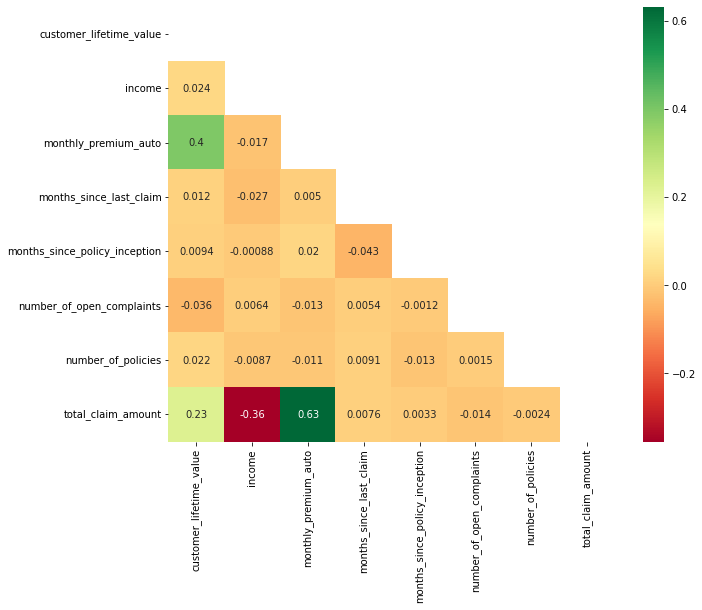

In [12]:
corr_matrix=data_numerical.corr() #Por default es Pearson
corr_matrix

mascara=np.zeros_like(corr_matrix)
mascara[np.triu_indices_from(mascara) ]=True 

fig , ax=plt.subplots(figsize=(10,8))
ax= sns.heatmap(corr_matrix, mask=mascara, annot=True, cmap='RdYlGn')

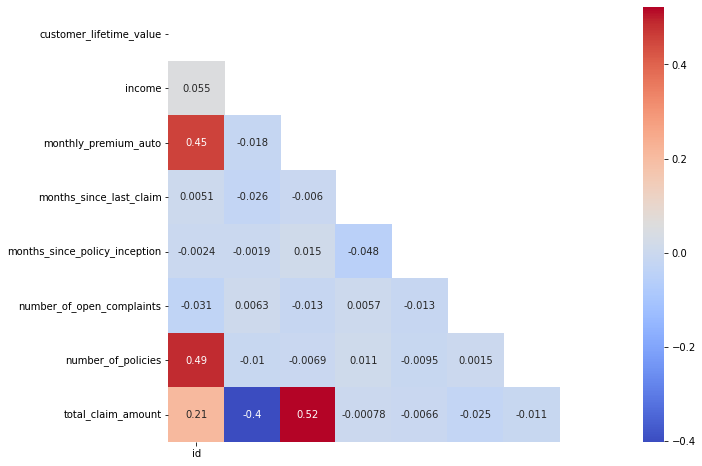

In [ ]:
#Plot Spearman Correlation Heatmap.
corr_matrix=df.corr(method='spearman')
corr_matrix

mascara=np.zeros_like(corr_matrix)
mascara[np.triu_indices_from(mascara) ]=True 

fig , ax=plt.subplots(figsize=(10,8))
ax= sns.heatmap(corr_matrix, mask=mascara, annot=True, cmap='coolwarm', xticklabels=['id'])

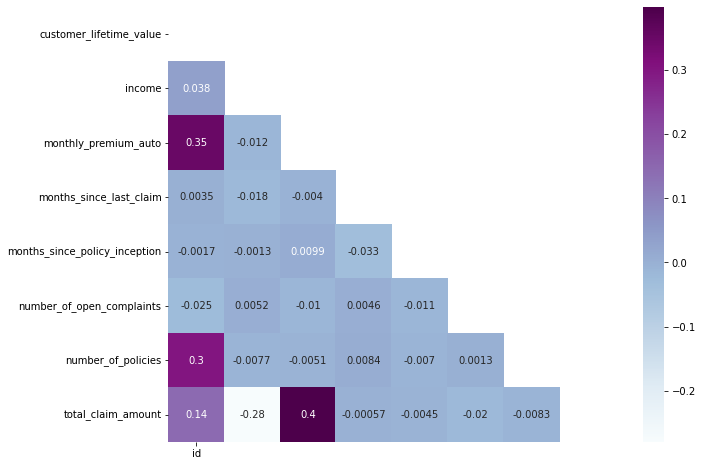

In [ ]:
corr_matrix=df.corr(method='kendall')
corr_matrix

mascara=np.zeros_like(corr_matrix)
mascara[np.triu_indices_from(mascara) ]=True 

fig , ax=plt.subplots(figsize=(10,8))
ax= sns.heatmap(corr_matrix, mask=mascara, annot=True, cmap='BuPu', xticklabels=['id'])

EDA (Exploratory Data Analysis) - Complete the following tasks to explore the dat

*   Show DataFrame info.
*   Describe DataFrame.
* Show a plot of the total number of responses.
* Show a plot of the response rate by the sales channel.
* Show a plot of the response rate by the total claim amount.
* Show a plot of the response rate by income.


In [13]:
data.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


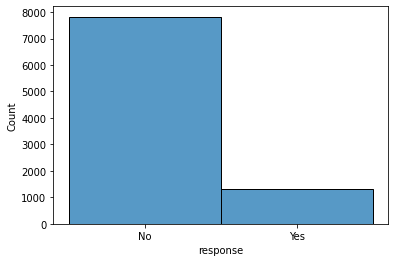

In [82]:
sns.histplot(data=df, x='response' , binwidth=3)

Text(0.5, 1.0, 'response rate by the sales channel')

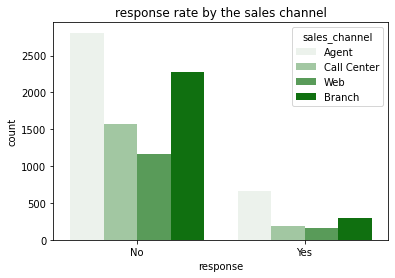

In [ ]:
#Show a plot of the response rate by the sales channel.
sns.countplot(data=df, x="response", hue="sales_channel", color='green')
plt.title('response rate by the sales channel', color='black')

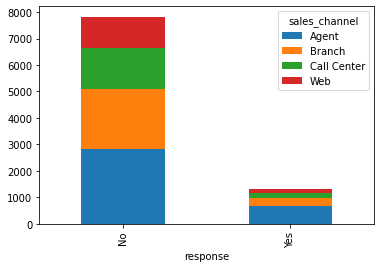

In [ ]:
df.groupby(['response', 'sales_channel']).size().unstack().plot(kind='bar',stacked=True)

Text(0.5, 1.0, 'Response Rate by the Total Claim Amount')

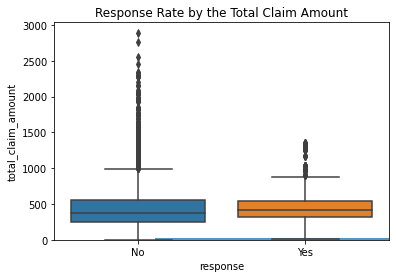

In [ ]:
sns.histplot(data=data, x='total_claim_amount', binwidth=3)
sns.boxplot(data=data, x='response', y='total_claim_amount')
plt.title("Response Rate by the Total Claim Amount")

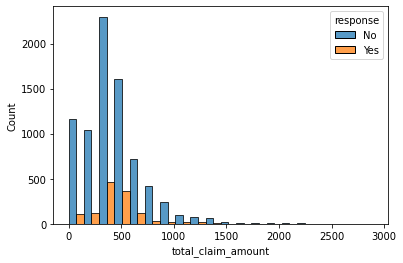

In [ ]:
sns.histplot(data=df, x='total_claim_amount', hue='response', multiple='dodge', bins=20 )

Processing Data
(Further processing...)



1.   X-y split.
2.   Normalize (numerical).
3. One Hot/Label Encoding (categorical).
4. Concat DataFrames

In [14]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler

In [15]:
X_num=data_numerical[['customer_lifetime_value', 'income', 'monthly_premium_auto']]
 

In [16]:
y=data['total_claim_amount']
data_x=X_num

X_num=data_numerical
X_cat=data_cat

In [17]:
transformer=StandardScaler().fit(X_num)
x_stan=transformer.transform(X_num)

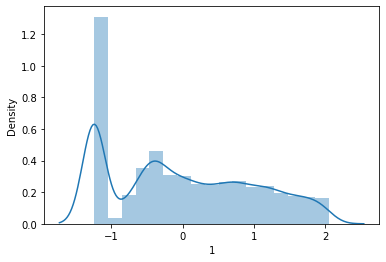

In [18]:
x_stan_df=pd.DataFrame(x_stan)

sns.distplot(x_stan_df[1])

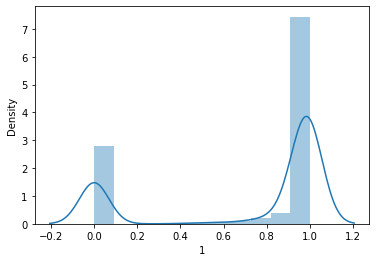

In [19]:
transformer=Normalizer().fit(X_num)
x_norm=transformer.transform(X_num)

x_norm_df=pd.DataFrame(x_norm)

sns.distplot(x_norm_df[1])


In [20]:
#ahora vamos a tratar la data categórica, i.e. pasarlo a numérico
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(drop='first').fit(X_cat)
encoder=encoder.transform(X_cat).toarray()
encoder

array([[0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 1., 0.]])

In [21]:
X=np.concatenate((x_stan, encoder),axis=1)
X

array([[-0.76287773,  0.61282744, -0.70392465, ...,  1.        ,
         1.        ,  0.        ],
       [-0.14924546, -1.23961684,  0.02269103, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.71063622,  0.36570978,  0.42959581, ...,  1.        ,
         1.        ,  0.        ],
       ...,
       [ 0.02313483, -1.23961684, -0.23889062, ...,  0.        ,
         1.        ,  0.        ],
       [-0.06993547, -0.51735647,  0.08082028, ...,  0.        ,
         0.        ,  0.        ],
       [-0.78495478, -1.23961684, -0.47140763, ...,  1.        ,
         1.        ,  0.        ]])

In [22]:
DF=np.concatenate((X,x_stan), axis=1)
DF

array([[-0.76287773,  0.61282744, -0.70392465, ..., -0.42224956,
        -0.82264788, -0.16963969],
       [-0.14924546, -1.23961684,  0.02269103, ..., -0.42224956,
         2.10615996,  2.400737  ],
       [ 0.71063622,  0.36570978,  0.42959581, ..., -0.42224956,
        -0.40424676,  0.45573376],
       ...,
       [ 0.02313483, -1.23961684, -0.23889062, ...,  2.87324529,
        -0.40424676,  1.22793667],
       [-0.06993547, -0.51735647,  0.08082028, ..., -0.42224956,
         0.01415436,  0.88511256],
       [-0.78495478, -1.23961684, -0.47140763, ..., -0.42224956,
        -0.82264788, -0.22200449]])

Linear Regression


*   Train-test split.
*   Apply linear regression.


In [23]:
#lo que vamos a hacer ahora, es separa el arreglo X en un % para entrenar un modelo y otro % para ponerlo a prueba
#recordando que y=data['total_claim_amount']
from sklearn.model_selection import train_test_split

#podemos tener un control de la selección aleatoria para que siempre sea la misma selección aleatoria
#no importa cuantas veces corramos esta celda con random state
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)

In [57]:
len(X_train)

7307

In [ ]:
len(X_num)

9134

In [ ]:
len(X_test) 

1827

In [24]:
from sklearn import linear_model
lm=linear_model.LinearRegression()

In [25]:
model=lm.fit(X_train, y_train)

In [26]:
from sklearn.metrics import mean_squared_error, r2_score
predictions=lm.predict(X_test)
r2_score(y_test,predictions)

0.999618250142621